# Ford Gobike Exploration Analysis

If you live in San Francisco, you have probably noticed the plethora of bikes and electric scooters. Now, Motivate is expanding the Ford GoBike program in San Francisco to include pedal-assist bikes.These bikes work by giving the rider a bit of a power boost while pedaling. Currently, there are 262 Ford GoBike stations with 2,600+ bikes across the San Francisco Bay Area.

Throughout this project, we'll be specifically looking at data related to Ford GoBike. We'll look at gleaning some insights across several observations and looking at them with some data visualizations.


## Table of contents

- Data wrangling
  - cleaning data
- Univariate Exploration
- Bivariate Exploration
- Multivariate Exploration
            

## Data wrangling 


In [541]:
#Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [542]:
df= pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [543]:
df.start_time.value_counts()

2019-02-01 13:40:09.4920    2
2019-02-11 17:05:07.8400    2
2019-02-15 07:47:00.1970    2
2019-02-07 09:06:07.0560    2
2019-02-25 08:52:07.5820    2
                           ..
2019-02-19 17:31:27.9960    1
2019-02-21 21:19:18.8950    1
2019-02-16 12:00:34.4120    1
2019-02-20 17:59:26.8360    1
2019-02-21 16:50:48.3980    1
Name: start_time, Length: 183401, dtype: int64

In [544]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
108193,390,2019-02-13 09:20:17.7710,2019-02-13 09:26:47.8480,95.0,Sanchez St at 15th St,37.766219,-122.431060,58.0,Market St at 10th St,37.776619,-122.417385,5298,Subscriber,1991.0,Male,No
72232,375,2019-02-19 16:45:32.4980,2019-02-19 16:51:48.2240,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,350.0,8th St at Brannan St,37.771431,-122.405787,4998,Subscriber,1964.0,Male,Yes
171430,673,2019-02-03 20:35:02.5990,2019-02-03 20:46:16.1090,121.0,Mission Playground,37.759210,-122.421339,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,5412,Subscriber,1975.0,Female,Yes
16150,414,2019-02-27 08:47:04.3680,2019-02-27 08:53:58.4720,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,4845,Subscriber,1994.0,Male,No
57507,1045,2019-02-21 08:04:27.3300,2019-02-21 08:21:52.3910,52.0,McAllister St at Baker St,37.777416,-122.441838,349.0,Howard St at Mary St,37.781010,-122.405666,4955,Subscriber,1982.0,Male,No


In [545]:
df.shape

(183412, 16)

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [547]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [548]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

we have missing data at (start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year)

In [549]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## Data cleaning

### changing data type of start_time and end_time to datetime.


In [550]:
df["start_time"]=pd.to_datetime(df["start_time"])
df["end_time"]=pd.to_datetime(df["end_time"])


In [551]:
df[["end_time" , "start_time"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   end_time    183412 non-null  datetime64[ns]
 1   start_time  183412 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.8 MB


### Insert Age column

In [552]:
df.insert(1,"Age", 2022- df['member_birth_year'].to_numpy())

In [553]:
df.head()

,duration_sec,Age,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,38.0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,NaN,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,50.0,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,33.0,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,48.0,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Splitting timestamp column into separate  time columns (time weekday, Start and end time hour)


In [554]:
df["weekday"]= df['start_time'].dt.strftime('%A')
df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour

In [555]:
df.head()

,duration_sec,Age,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,weekday,start_time_hour,end_time_hour
0,52185,38.0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17,8
1,42521,NaN,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,18,6
2,61854,50.0,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12,5
3,36490,33.0,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17,4
4,1585,48.0,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23,0


### Splitting timestamp column into separate date and time columns and Month - Year, month, column

in date we have same start month but in different days 
(Thanks to this link for helping me figure this out: https://erikrood.com/Python_References/extract_month_year_pandas_final.html.)
https://stackoverflow.com/questions/35595710/splitting-timestamp-column-into-separate-date-and-time-columns

In [556]:
df['new_start_date'] = [d.date() for d in df['start_time']]
df['new_start_time'] = [d.time() for d in df['start_time']]
df['new_end_date'] = [d.date() for d in df['end_time']]
df['new_end_time'] = [d.time() for d in df['end_time']]

In [557]:
df["new_start_date"]=pd.to_datetime(df["new_start_date"])
df["new_end_date"]=pd.to_datetime(df["new_end_date"])

In [558]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['year'], df['month'], df['day'] = df['start_time'].dt.year, df['start_time'].dt.month, df['start_time'].dt.day

### Insert duration in minutes


In [559]:
df["duration_min"]=df["duration_sec"]/60

### changing data type of bike share for all trip to boolean

In [560]:
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [561]:
df[['bike_share_for_all_trip']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 1 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   bike_share_for_all_trip  183412 non-null  bool 
dtypes: bool(1)
memory usage: 179.2 KB


### Drooping Unuseful Columns

 we will keep ***start_station_name*** but we will droop **'start_station_id', 'start_station_latitude', and 'start_station_longitude', end_station_id', 'end_station_latitude', and 'end_station_longitude'** due to the station name is enough 
 

In [562]:
df.drop(columns= ['start_station_latitude', 'start_station_longitude',  'end_station_latitude','end_station_longitude'], inplace= True)

In [563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   Age                      175147 non-null  float64       
 2   start_time               183412 non-null  datetime64[ns]
 3   end_time                 183412 non-null  datetime64[ns]
 4   start_station_id         183215 non-null  float64       
 5   start_station_name       183215 non-null  object        
 6   end_station_id           183215 non-null  float64       
 7   end_station_name         183215 non-null  object        
 8   bike_id                  183412 non-null  int64         
 9   user_type                183412 non-null  object        
 10  member_birth_year        175147 non-null  float64       
 11  member_gender            175147 non-null  object        
 12  bike_share_for_a

###  Drop missing values 

In [564]:
df.dropna(inplace=True)

In [565]:
df.sample(5)

,duration_sec,Age,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,...,start_time_hour,end_time_hour,new_start_date,new_start_time,new_end_date,new_end_time,year,month,day,duration_min
67440,665,34.0,2019-02-20 07:51:42.518,2019-02-20 08:02:47.792,166.0,College Ave at Alcatraz Ave,239.0,Bancroft Way at Telegraph Ave,1270,Subscriber,...,7,8,2019-02-20,07:51:42.518000,2019-02-20,08:02:47.792000,2019,2,20,11.083333
136456,1311,43.0,2019-02-08 09:35:20.159,2019-02-08 09:57:11.258,70.0,Central Ave at Fell St,17.0,Embarcadero BART Station (Beale St at Market St),4960,Subscriber,...,9,9,2019-02-08,09:35:20.159000,2019-02-08,09:57:11.258000,2019,2,8,21.850000
37397,377,29.0,2019-02-23 14:15:39.350,2019-02-23 14:21:56.397,64.0,5th St at Brannan St,89.0,Division St at Potrero Ave,5915,Subscriber,...,14,14,2019-02-23,14:15:39.350000,2019-02-23,14:21:56.397000,2019,2,23,6.283333
124769,708,34.0,2019-02-11 08:12:54.806,2019-02-11 08:24:43.419,22.0,Howard St at Beale St,350.0,8th St at Brannan St,4553,Subscriber,...,8,8,2019-02-11,08:12:54.806000,2019-02-11,08:24:43.419000,2019,2,11,11.800000
127168,375,36.0,2019-02-10 16:35:52.040,2019-02-10 16:42:07.930,114.0,Rhode Island St at 17th St,130.0,22nd St Caltrain Station,4877,Subscriber,...,16,16,2019-02-10,16:35:52.040000,2019-02-10,16:42:07.930000,2019,2,10,6.250000


## Univariate Exploration

### How Many Male and Female we have?

In gender i have male, female and other but others didn't make any sense in a real life so i decide to make it out of my data due to it didn't a significant in results 

Male around 135000
Female around 40000

In [566]:
# for removing others from member genders 
df=df[df.member_gender.isin(['Male', 'Female'])]

''

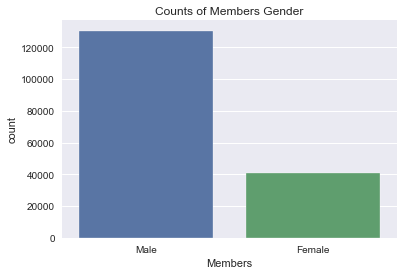

In [567]:
sns.set_style("darkgrid")
sns.countplot(x='member_gender', data=df)
plt.title("Counts of Members Gender")
plt.xlabel("Members")
;

### what is types of Users and How many each of type we have?

they around 
 19000 customers and 
 170000 subscribers

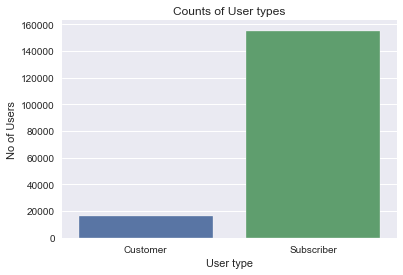

In [568]:
sns.set_style("darkgrid")
sns.countplot(x='user_type', data=df)
plt.title("Counts of User types")
plt.xlabel("User type")
plt.ylabel("No of Users");

### How many bike shares for all trip?

- we can conclude that the most of users don't share their bike for all trips.


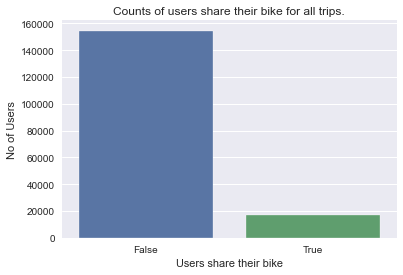

In [569]:
sns.set_style("darkgrid")
sns.countplot(x='bike_share_for_all_trip', data=df)
plt.title("Counts of users share their bike for all trips.")
plt.xlabel("Users share their bike")
plt.ylabel("No of Users");

### what's probability of Gender and Users types?

- Male= 0.75   and female= 0.25
- Subscriber= 0.9   and customer= 0.1

''

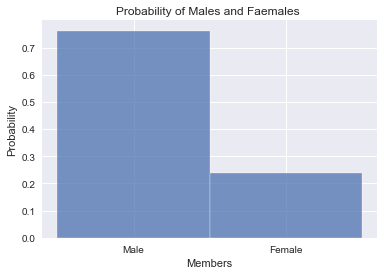

In [570]:
sns.set_style("darkgrid")
sns.histplot(x='member_gender',stat='probability', data=df)
plt.title("Probability of Males and Faemales ")
plt.xlabel("Members")
;

''

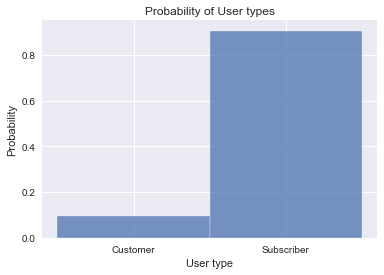

In [571]:
sns.set_style("darkgrid")
sns.histplot(x='user_type', stat='probability', data=df)
plt.title("Probability of User types")
plt.xlabel("User type")
;

### How long does the average trip take?

the duration for all trips is smaller than 2500 sec and the peak(the most time takes) around (250 - 750) sec. Trip duration start increasing from at 0 to 750 but then starts to fall under 2000 sec.

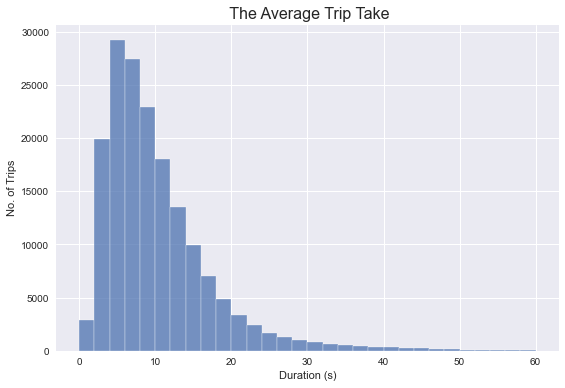

In [614]:
plt.figure(figsize=[9, 6])
sns.set_style('darkgrid')
sns.histplot(x='duration_min', binrange=(0, 60), binwidth= 2, 
             data=df)
plt.title(' The Average Trip Take', fontsize = 16)
plt.xlabel("Duration (s)")
plt.ylabel('No. of Trips');

### what is the average of age depend on No. of trips?

- The most common users ages who had a ride between (25 - 40) years 
- No users less than 20 years old
- Low users between (45 - 80) years

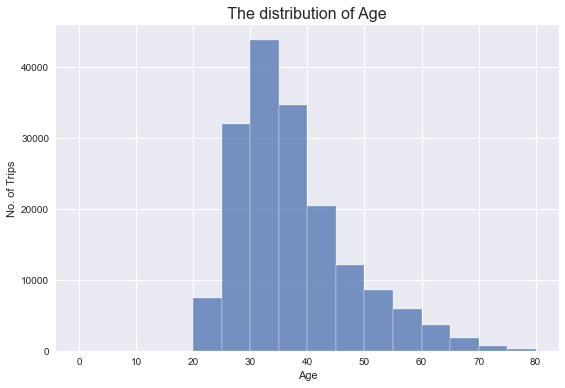

In [573]:
plt.figure(figsize=[9, 6])
sns.set_style('darkgrid')
sns.histplot(x='Age', binrange=(0, 80), binwidth=5 ,
             data=df)
plt.title(' The distribution of Age ', fontsize = 16)
plt.xlabel("Age")
plt.ylabel('No. of Trips');

### what's the most days frequently?

Tuesdays and Wednesdays are the most frequently days , however Thursdays, Mondays and Fridays are very close to the Tues/Weds numbers , saturday and sunday are not popular as the rest of days.

In [574]:
weekday = [ 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

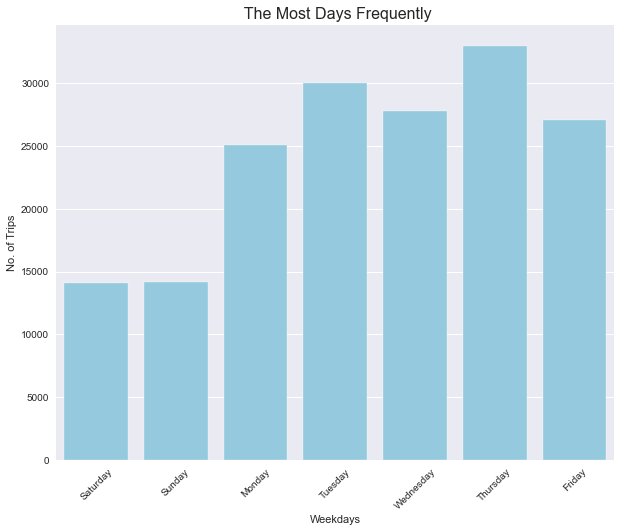

In [575]:
plt.figure(figsize=[10, 8])
sns.set_style('darkgrid')
sns.countplot(x='weekday',
             data=df, color="skyblue", order= weekday)
plt.title('  The Most Days Frequently ', fontsize = 16)
plt.xlabel("Weekdays")
plt.xticks(rotation=45)
plt.ylabel('No. of Trips');

### what's the most hour frequently?
The most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm

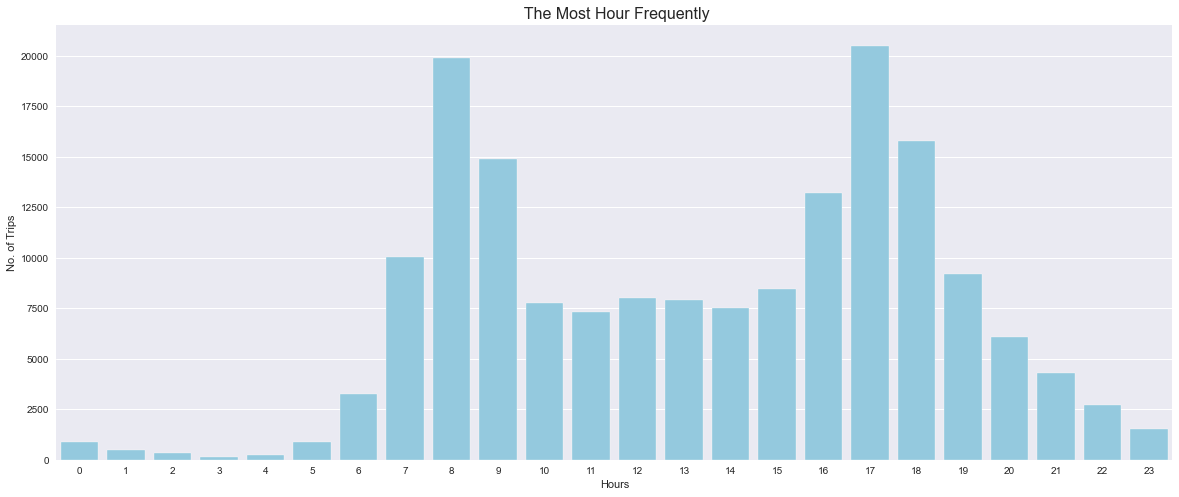

In [576]:
plt.figure(figsize=[20, 8])
sns.set_style('darkgrid')
sns.countplot(x='start_time_hour',
             data=df, color="skyblue")
plt.title('  The Most Hour Frequently ', fontsize = 16)
plt.xlabel("Hours")
plt.ylabel('No. of Trips');

#### What is The Most station Frequently?
The most stations Frequently to start are Market St and San francisco caltrian station 2

In [577]:
o= df.start_station_name.value_counts().head(50).index
top50= df.start_station_name.value_counts().index[:50]

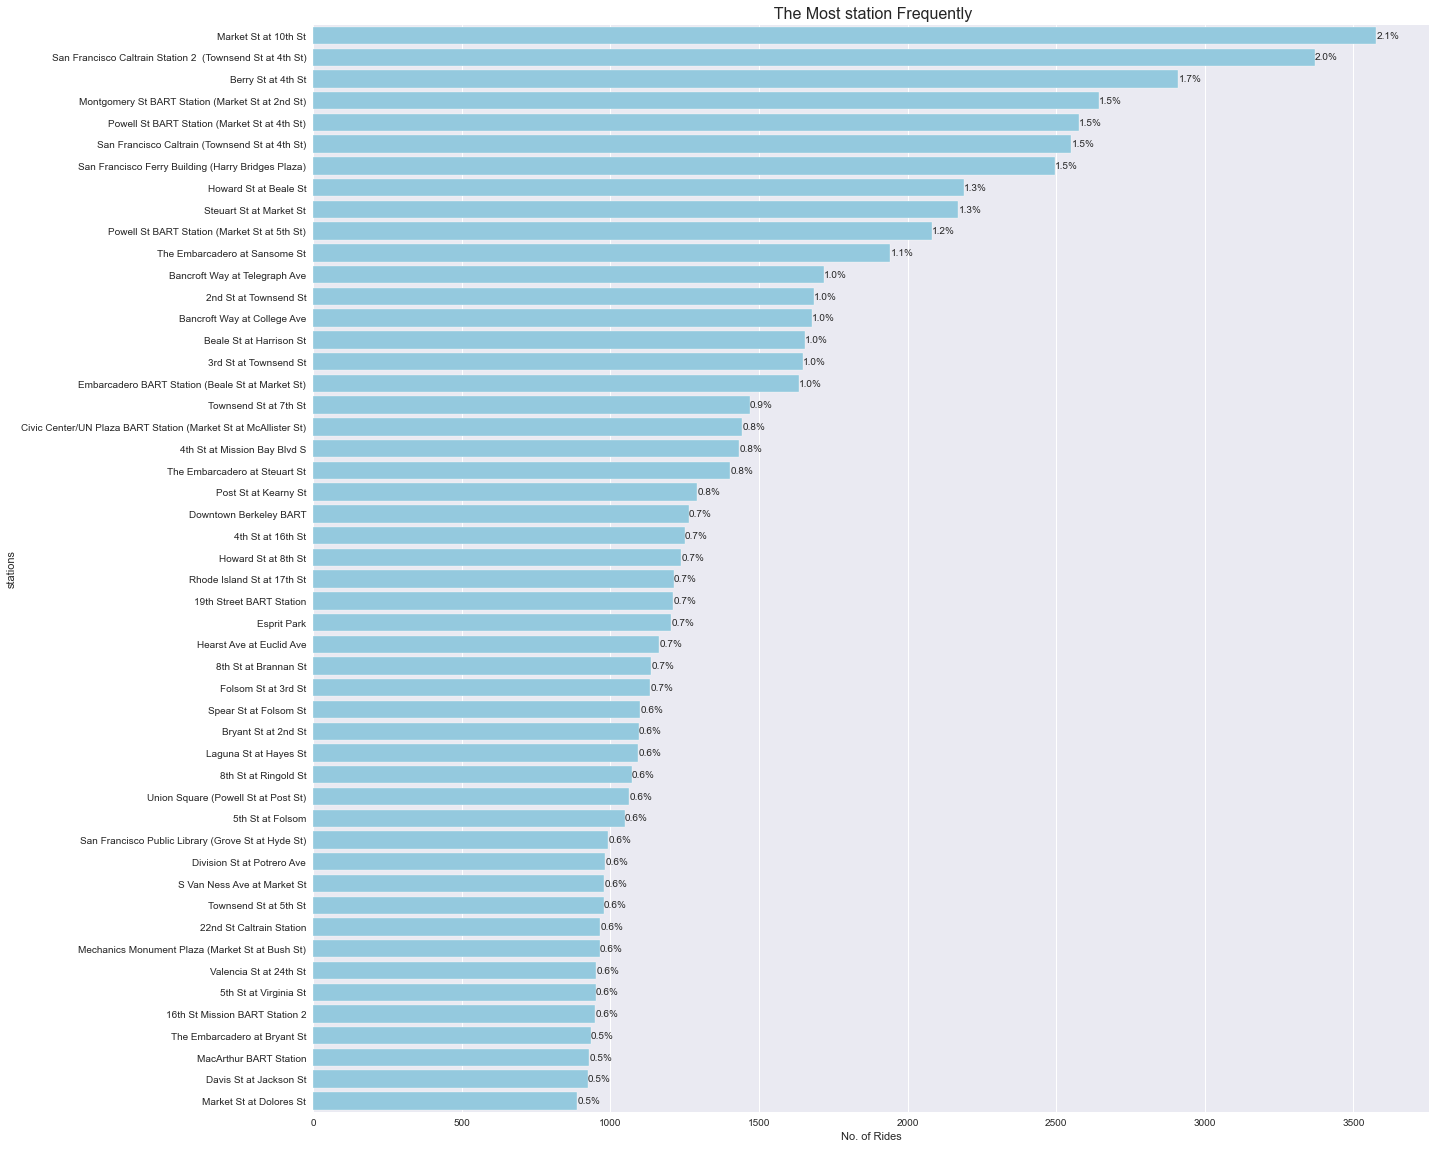

In [578]:
plt.figure(figsize=[20, 20])
sns.set_style('darkgrid')
sns.countplot(y='start_station_name',
             data=df, order=o, color="skyblue")
plt.title('  The Most station Frequently ', fontsize = 16)
plt.xlabel("No. of Rides")
plt.ylabel('stations');

#percentage 
start_counts = df.start_station_name.value_counts().head(50)
for i in range(start_counts.shape[0]):
  count = start_counts[i]
  pct_string = '{:0.1f}%'.format(100*count/df.shape[0])
  plt.text(count+1, i, pct_string, va = 'center');

### which is the most station Frequently?  
- station ID 59 was the most start station and station ID 59 was the most start station 68.
- we have almost the same graph so have the same frequently at end and start station. 


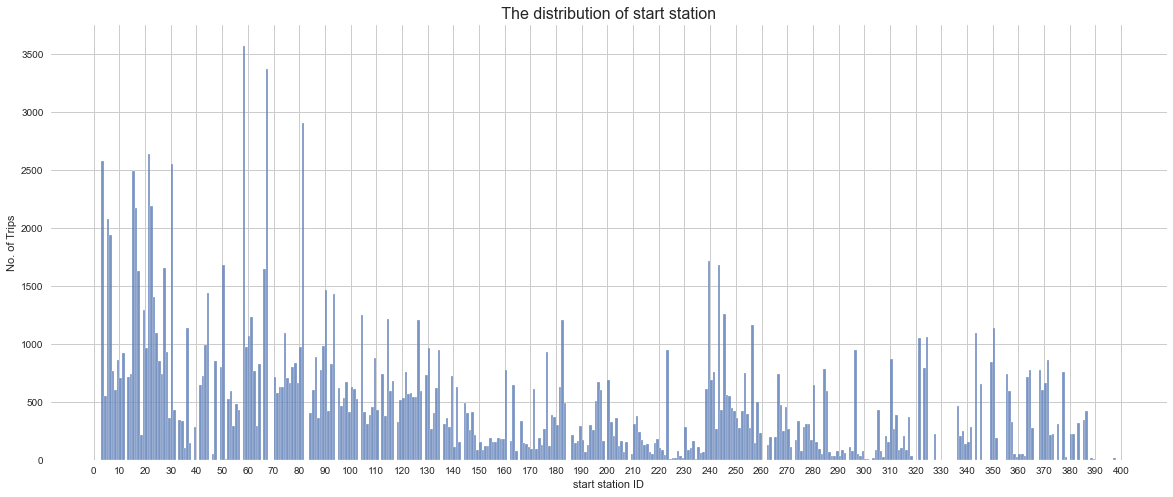

In [579]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.histplot(x='start_station_id', binwidth=1,
             data=df)
plt.title(' The distribution of start station ', fontsize = 16)
plt.xlabel("start station ID")
plt.ylabel('No. of Trips')
plt.xticks(range(0, 401, 10));

## Bivariate Exploration

### what is relation between Age of users and the duration of trips?

**Ages between [20:40] have a longer durations (trips) so when user was younger they have a long trips**

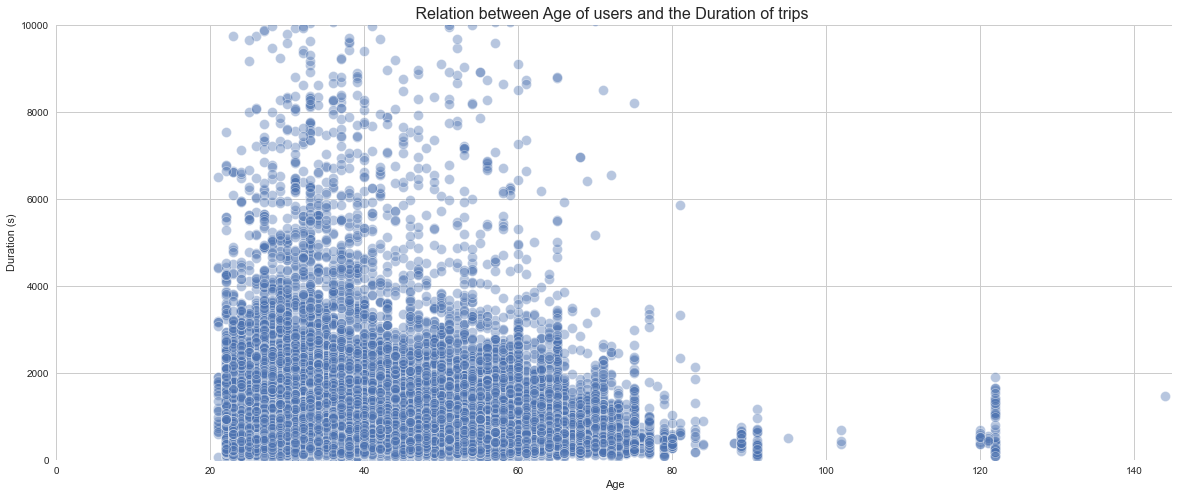

In [580]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.scatterplot(x= 'Age', y="duration_sec",
                s=100,
                alpha=0.4, data= df)
plt.axis([0, 145, 0, 10000])
plt.title(' Relation between Age of users and the Duration of trips  ', fontsize = 16)
plt.xlabel("Age")
plt.ylabel('Duration (s)');

In [581]:
age_duration = (
    df
    .groupby('duration_sec')
    .Age
    .value_counts()
    .unstack()
    .fillna(0)
)

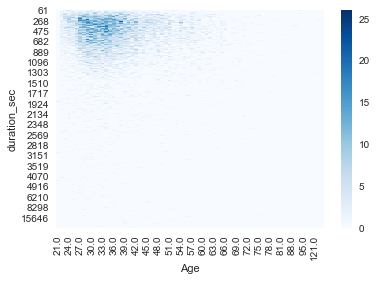

In [582]:
sns.set_style('darkgrid')
sns.heatmap(age_duration, cmap='Blues', );

### what is Relation between start station and The Duration of trips?

- some of start station and end station had highly Duration of trips so maybe The Duration of trips depend on station.
- we can see that what stations result in starting of longer trips and what stations comes end of longer trips.

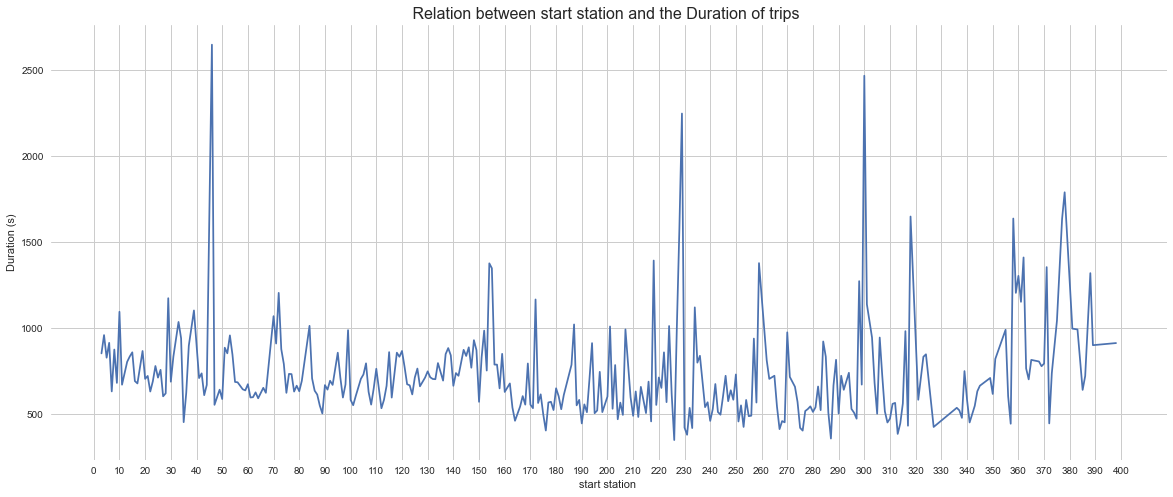

In [583]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.lineplot(x= 'start_station_id', y="duration_sec", ci=None, 
                 data= df)
plt.title(' Relation between start station and the Duration of trips  ', fontsize = 16)
plt.xlabel("start station ")
plt.ylabel('Duration (s)')
plt.xticks(range(0, 401, 10));

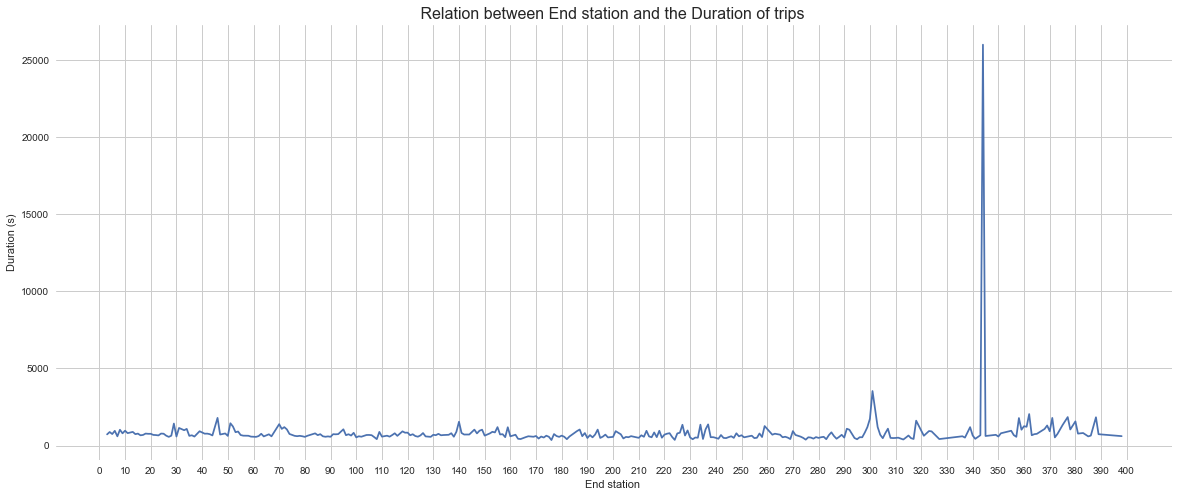

In [584]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.lineplot(x= 'end_station_id', y="duration_sec", ci=None, 
                 data= df)
plt.title(' Relation between End station and the Duration of trips  ', fontsize = 16)
plt.xlabel("End station ")
plt.ylabel('Duration (s)')
plt.xticks(range(0, 401, 10));

### what is the top 10 of stations and which stations have the large duration?

- From the ten most frequently visited places, the average ride time of about 600 seconds. 
- The highly frequently visited station is San Franscisco Ferry Building.

In [585]:
#to calculate to 10 station
top_10= df.start_station_name.value_counts().head(10).index

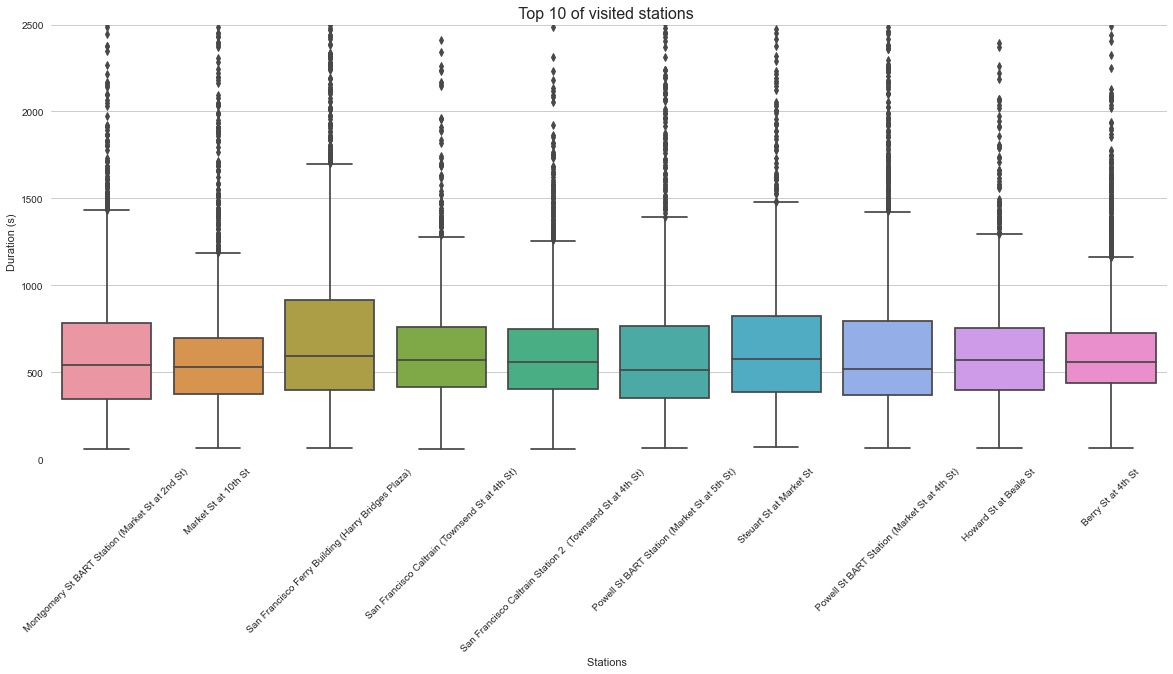

In [586]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.boxplot(x= 'start_station_name', y="duration_sec",  width=0.8, fliersize=5 ,
                 data= df[df.start_station_name.isin(top_10)])
plt.xticks(rotation = 45)
plt.title(' Top 10 of visited stations  ', fontsize = 16)
plt.xlabel("Stations ")
plt.ylabel('Duration (s)')
plt.ylim(0, 2500);

### what is relation between Hours of day and the duration of trips in the week?
higher hours with long duration rides is 2, 3 AM and lower hours is 5,6,7 AM and 10 PM

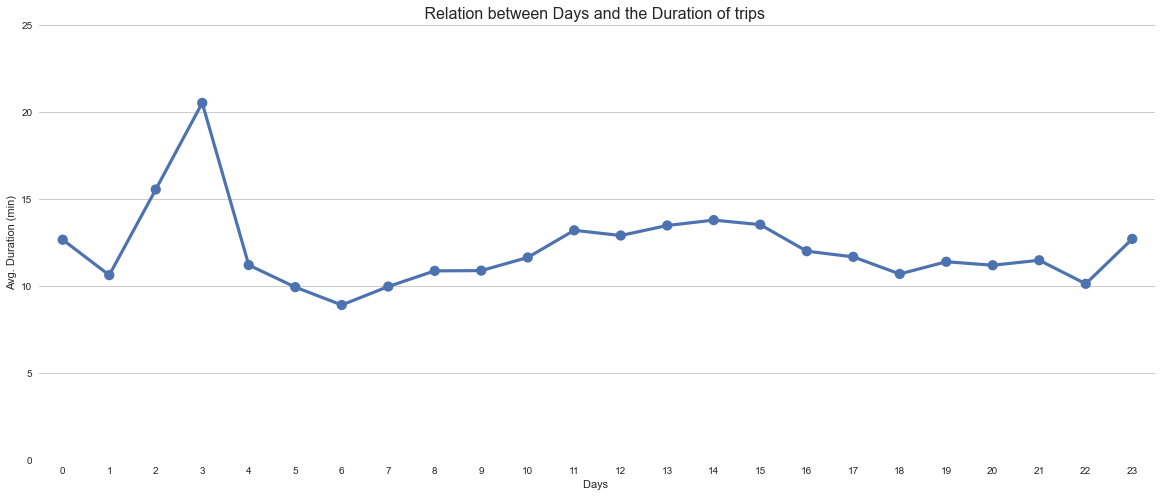

In [587]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.pointplot(x= 'start_time_hour', y="duration_min", ci=None,
                 data= df)
plt.title(' Relation between Days and the Duration of trips  ', fontsize = 16)
plt.xlabel("Days ")
plt.ylabel('Avg. Duration (min)')
plt.ylim(0,25);

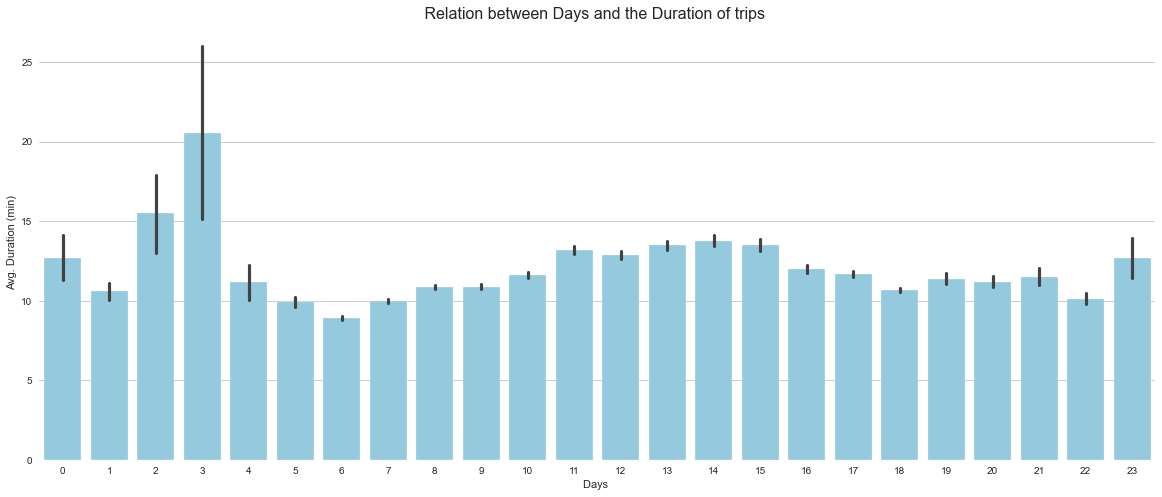

In [588]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.barplot(x= 'start_time_hour', y="duration_min",  estimator=np.mean , color= "skyblue", ci= 65,
                 data= df)
plt.title(' Relation between Days and the Duration of trips  ', fontsize = 16)
plt.xlabel("Days ")
plt.ylabel('Avg. Duration (min)')
plt.yticks(range(0, 28, 5));

### what is Relation between Weekdays and The Duration of trips in the week?

we see the relation between Days and The Duration of trips and the higher days and lower days in the week.

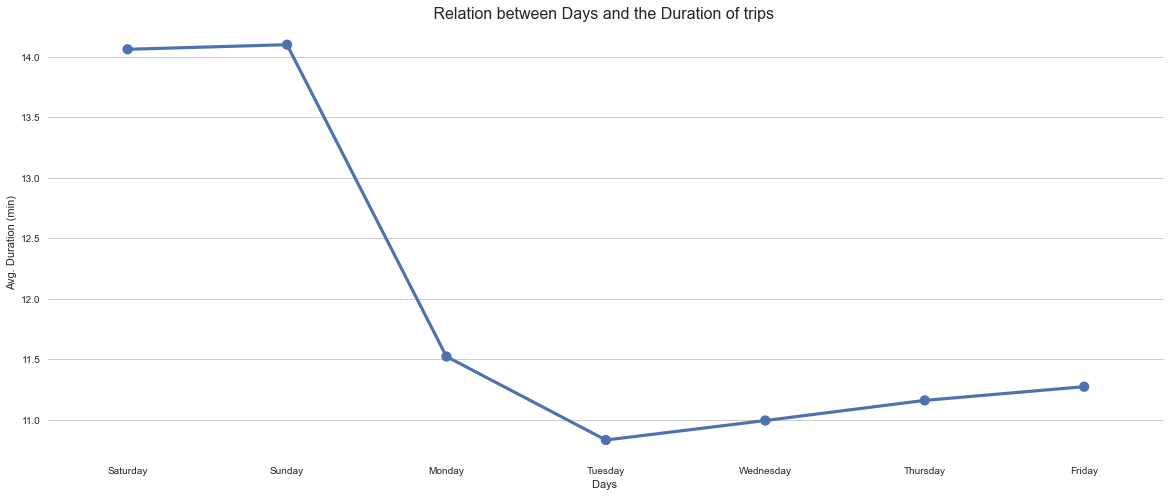

In [589]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.pointplot(x= 'weekday', y="duration_min", ci=None, order=weekday,
                 data= df)
plt.title(' Relation between Days and the Duration of trips  ', fontsize = 16)
plt.xlabel("Days ")
plt.ylabel('Avg. Duration (min)')
plt.xticks(range(0, 7, 1));

### what is average duration of trip for weekdays?
the most days has long duration is saturday and sunday and less days is tuesday and wednesday 

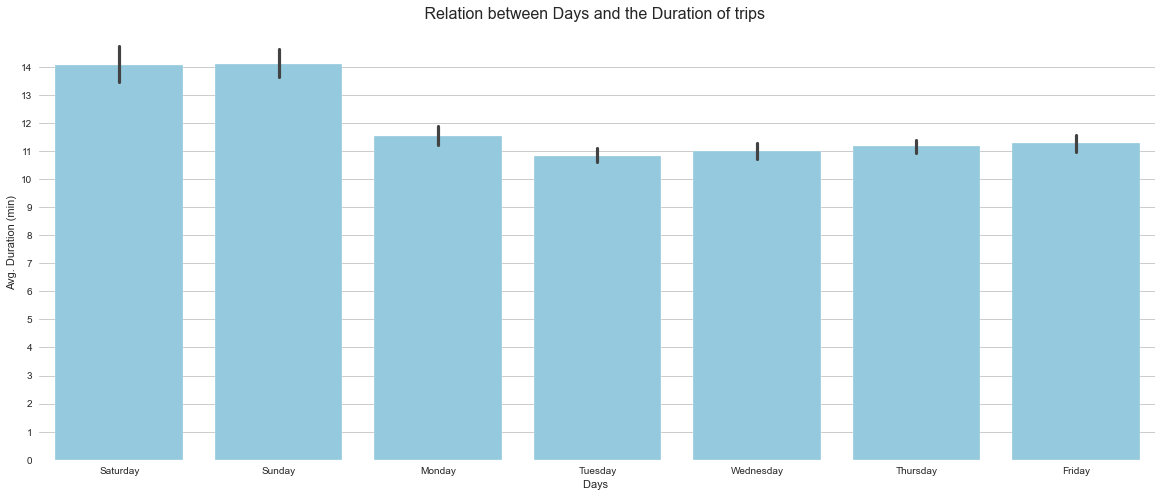

In [590]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.barplot(x= 'weekday', y="duration_min", order=weekday, estimator=np.mean , color= "skyblue",
                 data= df)
plt.title(' Relation between Days and the Duration of trips  ', fontsize = 16)
plt.xlabel("Days ")
plt.ylabel('Avg. Duration (min)')
plt.xticks(range(0, 7, 1))
plt.yticks(range(0, 15, 1));

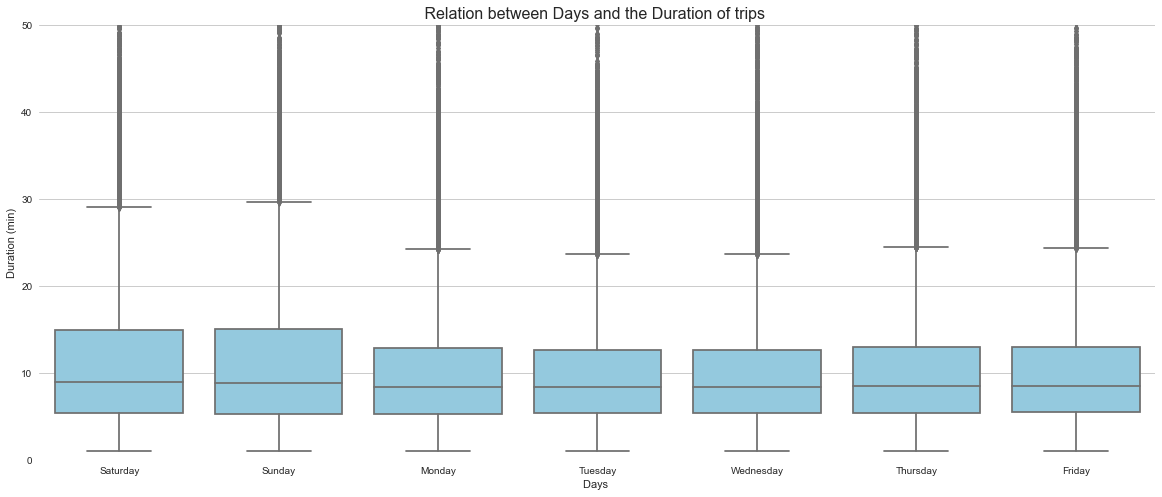

In [591]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.boxplot(x= 'weekday', y="duration_min", order=weekday, color= "skyblue",
                 data= df)
plt.title(' Relation between Days and the Duration of trips  ', fontsize = 16)
plt.xlabel("Days ")
plt.ylabel('Duration (min)')
plt.ylim(0, 50);

### How does the duration of ride bikes depend on Gender? 
- In spite of number of males more than females but females had a longer rides than males.
- average rides for male takes 500 sec.
- average rides for female takes 600 sec.

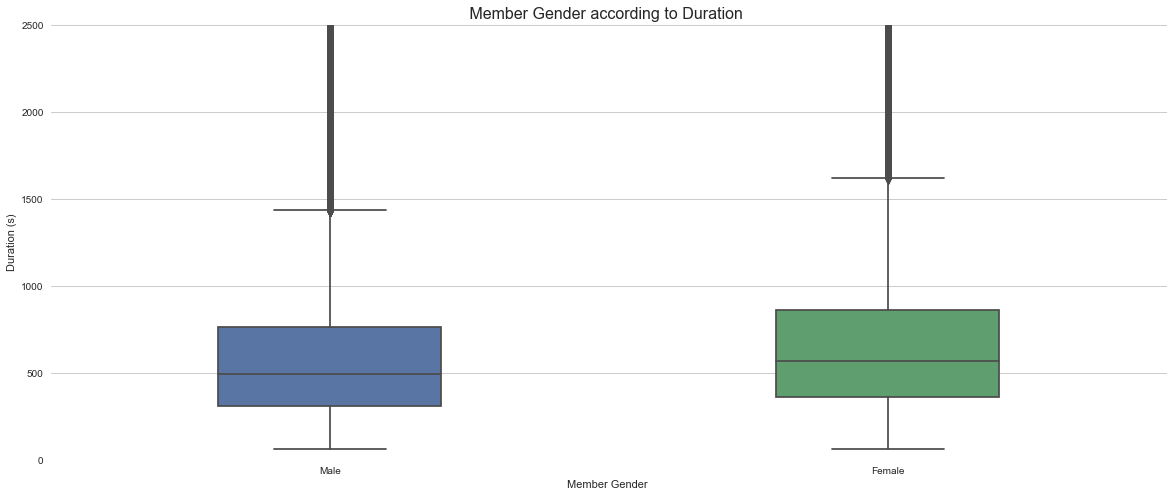

In [592]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.boxplot(x= 'member_gender', y="duration_sec",  width=0.4, fliersize=8 ,
                 data= df)

plt.title(' Member Gender according to Duration  ', fontsize = 16)
plt.xlabel("Member Gender ")
plt.ylabel('Duration (s)')
plt.ylim(0, 2500);

### How does the duration of ride bikes depend on User types? 
- Here we can see that higher percentage of customers are taking longer trips then compared to subscribers.
- average rides for customer takes 750 sec.
- average rides for subscriber takes 500 sec.

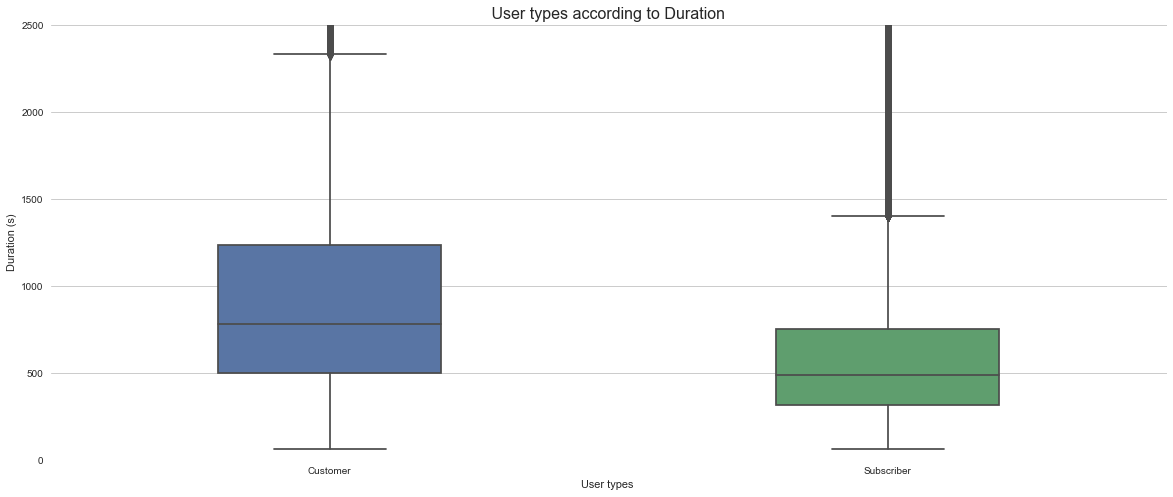

In [593]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.boxplot(x= 'user_type', y="duration_sec",  width=0.4, fliersize=8 ,
                 data= df)

plt.title(' User types according to Duration ', fontsize = 16)
plt.xlabel("User types ")
plt.ylabel('Duration (s)')
plt.ylim(0, 2500);

### How does the duration of ride bikes depend on users share their bike for all ride? 
- Here we can see that higher percentage of users don't share their bike are taking longer trips.

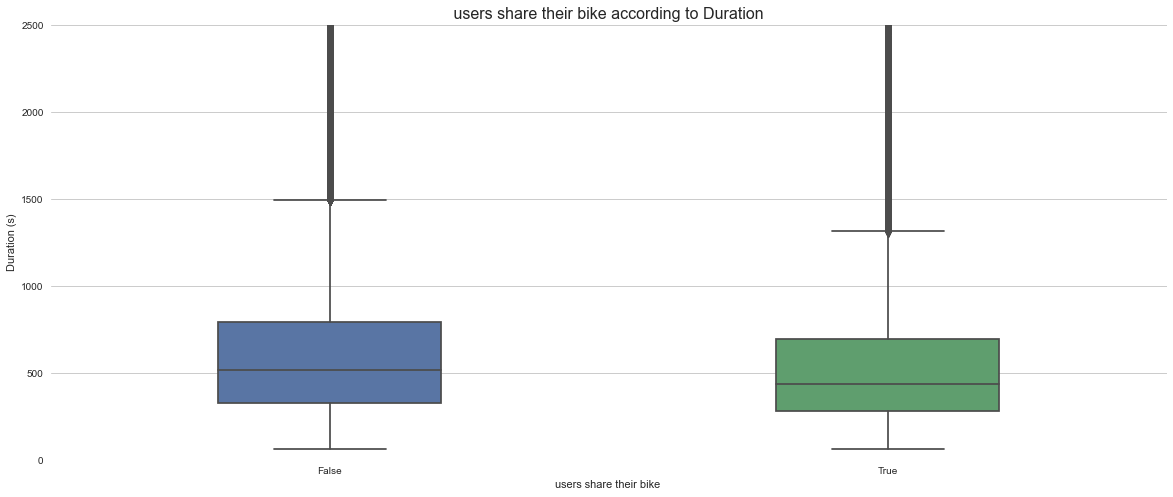

In [594]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.boxplot(x= 'bike_share_for_all_trip', y="duration_sec",  width=0.4, fliersize=8 ,
                 data= df)

plt.title(' users share their bike according to Duration ', fontsize = 16)
plt.xlabel("users share their bike ")
plt.ylabel('Duration (s)')
plt.ylim(0, 2500);

### what is relation between Age and gender?
Though not a huge difference, male riders tend to have shorter trips compared to female users, indicated by both a smaller median and shorter IQR

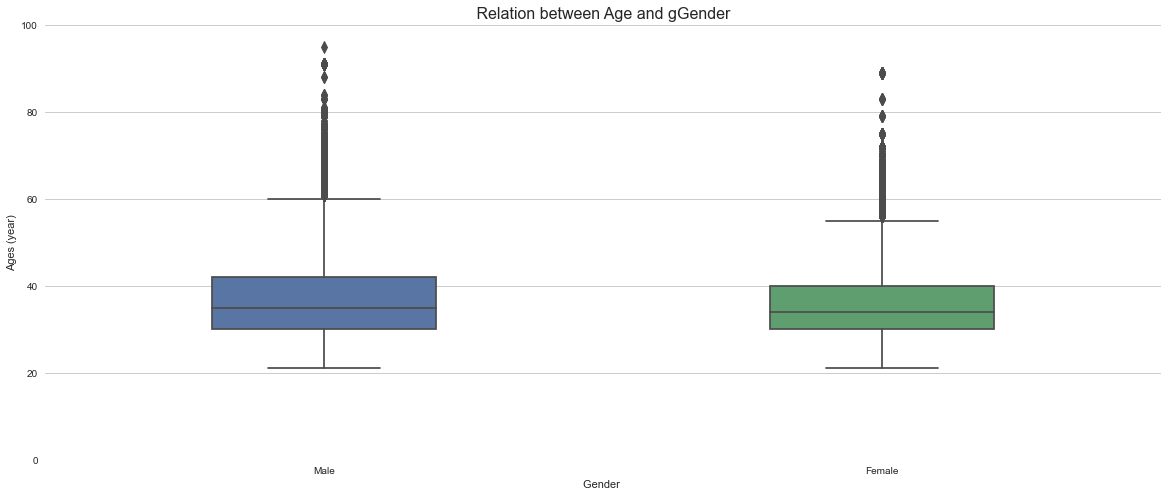

In [595]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.boxplot(x= 'member_gender', y="Age",  width=0.4, fliersize=8 ,
                 data= df)

plt.title(' Relation between Age and gGender ', fontsize = 16)
plt.xlabel("Gender ")
plt.ylabel('Ages (year)')
plt.ylim(0, 100);

## Multivariate Exploration
To  explore in this part of the analysis is how the three categorical measures gender, user type and Bike share for all trip within the relationship between duration of trip and age of users.

### what's the most days frequently depending on User Type?
- the most day have trips is thursday as we known it is weekend so it have high number of tips.
- subscribers making more rides due to they using it everyday for a specific purpose work and study. 

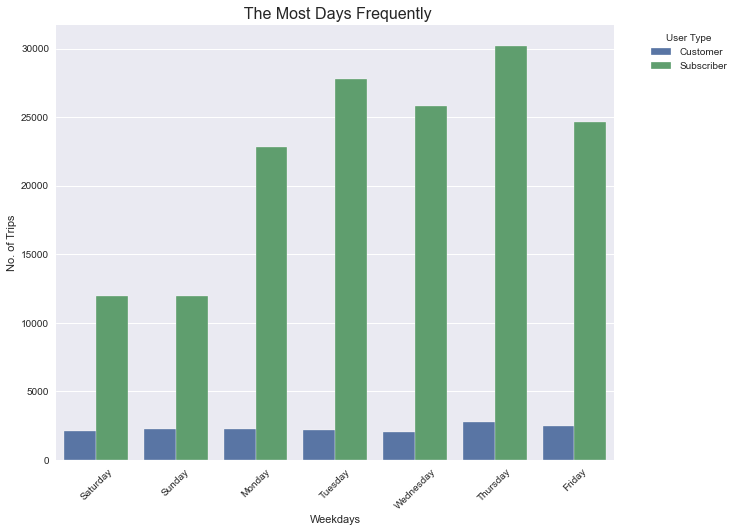

In [596]:
plt.figure(figsize=[10, 8])
sns.set_style('darkgrid')
sns.countplot(x='weekday', hue="user_type",
             data=df, order= weekday)
plt.title('  The Most Days Frequently ', fontsize = 16)
plt.xlabel("Weekdays")
plt.xticks(rotation=45)
plt.ylabel('No. of Trips')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=("User Type"));

### what's the most hour frequently?
The most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm This might be related to the time for work and school.

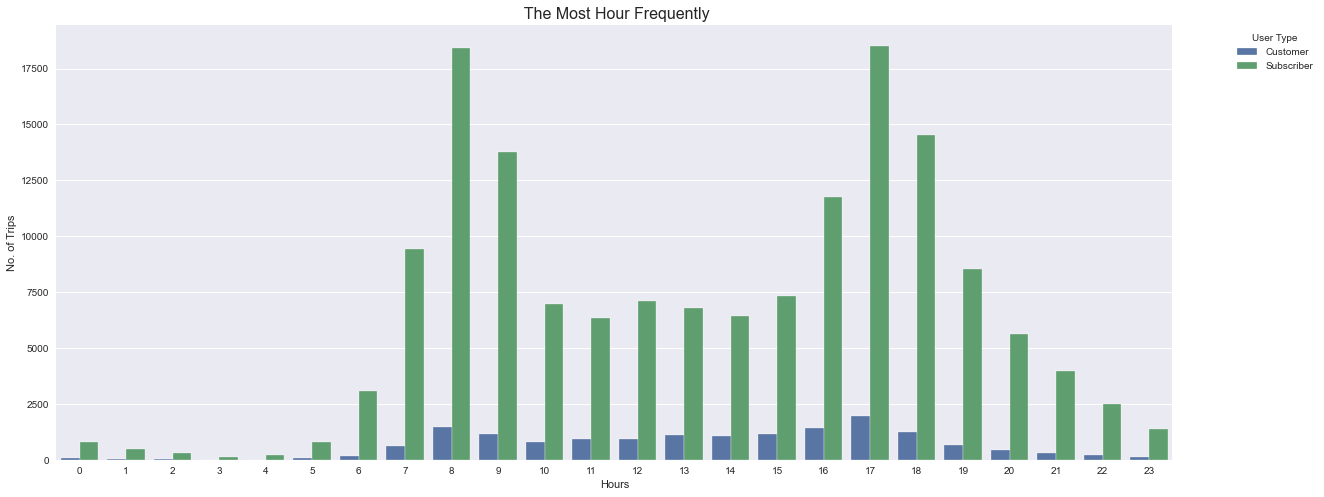

In [597]:
plt.figure(figsize=[20, 8])
sns.set_style('darkgrid')
sns.countplot(x='start_time_hour', hue="user_type",
             data=df,)
plt.title('  The Most Hour Frequently ', fontsize = 16)
plt.xlabel("Hours")
plt.ylabel('No. of Trips')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=("User Type"));

### what is relation between weekday and the duration of trips in the week depending on user type?
Customers have consistently longer trips than subscribers

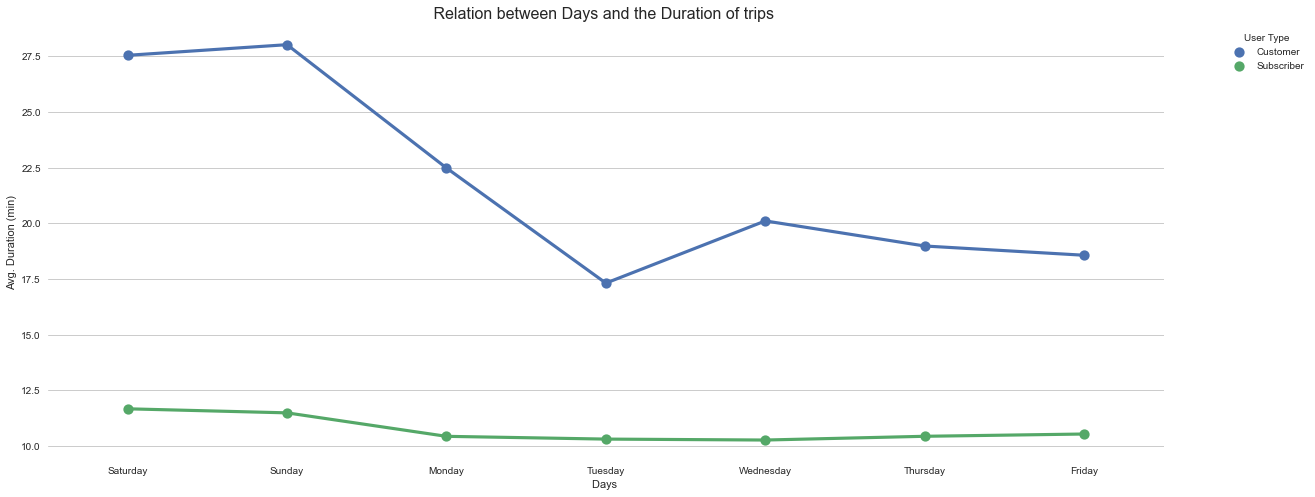

In [598]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.pointplot(x= 'weekday', y="duration_min", ci=None, order=weekday, hue=("user_type"),
                 data= df)
plt.title(' Relation between Days and the Duration of trips  ', fontsize = 16)
plt.xlabel("Days ")
plt.ylabel('Avg. Duration (min)')
plt.xticks(range(0, 7, 1))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=("User Type"));

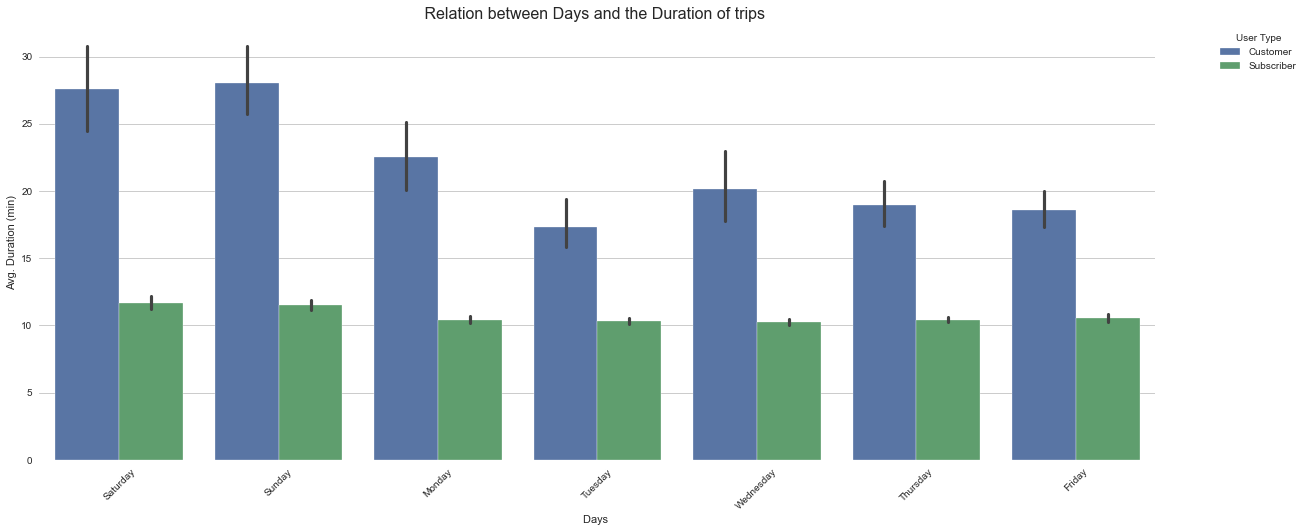

In [599]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.barplot(x= 'weekday', y="duration_min", order=weekday, estimator=np.mean , hue="user_type",
                 data= df)
plt.title(' Relation between Days and the Duration of trips  ', fontsize = 16)
plt.xlabel("Days ")
plt.ylabel('Avg. Duration (min)')
plt.xticks(range(0, 7, 1))
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=("User Type"));

### what is relation between Hours of day and the duration of trips in the week?
Customers have consistently longer trips across all hours of the day. However, customer trips are much longer at midnight and midday

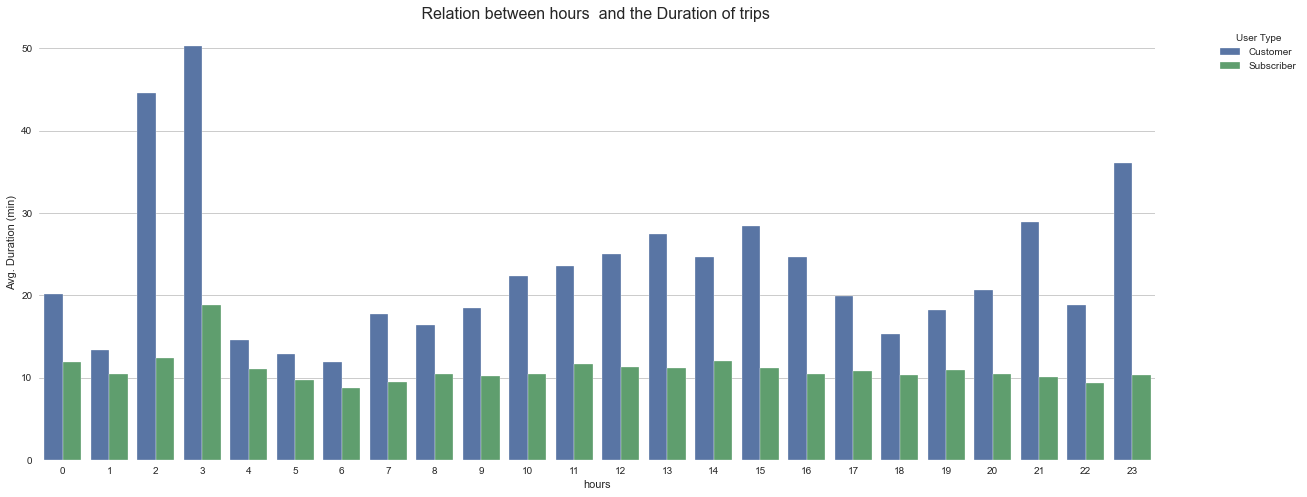

In [615]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.barplot(x= 'start_time_hour', y="duration_min",  estimator=np.mean , hue= "user_type", ci= None,
                 data= df)
plt.title(' Relation between hours  and the Duration of trips  ', fontsize = 16)
plt.xlabel("hours")
plt.ylabel('Avg. Duration (min)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=("User Type"));

### How does  Gender at different ages effect on duration of trips?

- As we shown in below graphs we have high numbers of males at high ages more than woman.
- At higher ages for males take long trips more than woman. 
- Here we observed that though the number of higher duration trip is higher for male but percentage is higher for women.

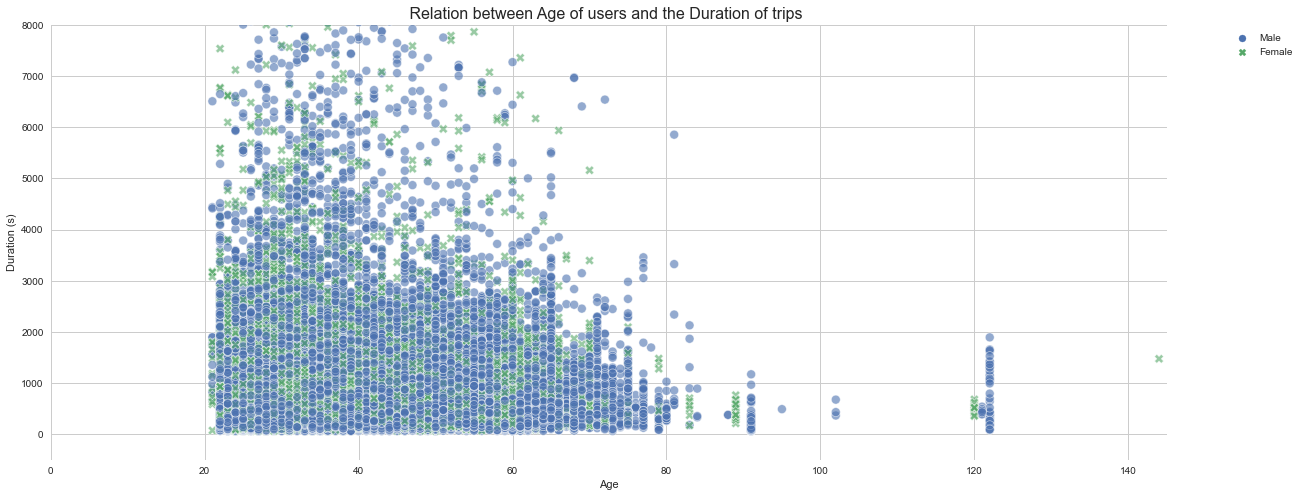

In [601]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.scatterplot(x= 'Age', y="duration_sec", style= 'member_gender', hue= 'member_gender',
                s=80,
                alpha=0.6, data= df)
plt.axis([0, 145, -500, 8000])
plt.title(' Relation between Age of users and the Duration of trips  ', fontsize = 16)
plt.xlabel("Age")
plt.ylabel('Duration (s)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

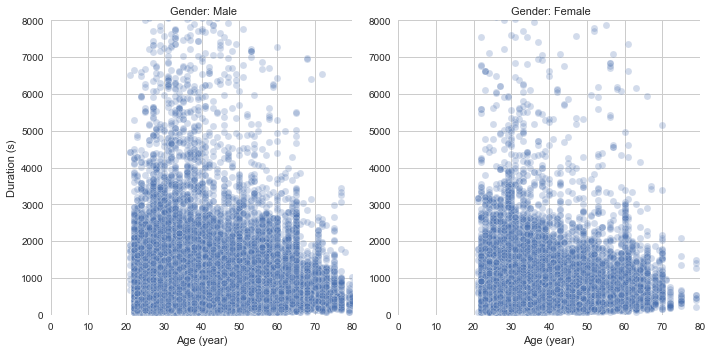

In [602]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, col='member_gender', height = 5, 
                 xlim = (0, 80), ylim = (0, 8000), sharey= False)
g.map(sns.scatterplot, 'Age', 'duration_sec', alpha=0.25)
g.set_axis_labels('Age (year)', 'Duration (s)')
g.set_titles(col_template=' Gender: {col_name}');

### How does  User types at different ages effect on duration of trips?
- As we shown in below graphs, there is slight tilt to higher age for subscribers having long trip duration and subscribers have higher ages than customer.

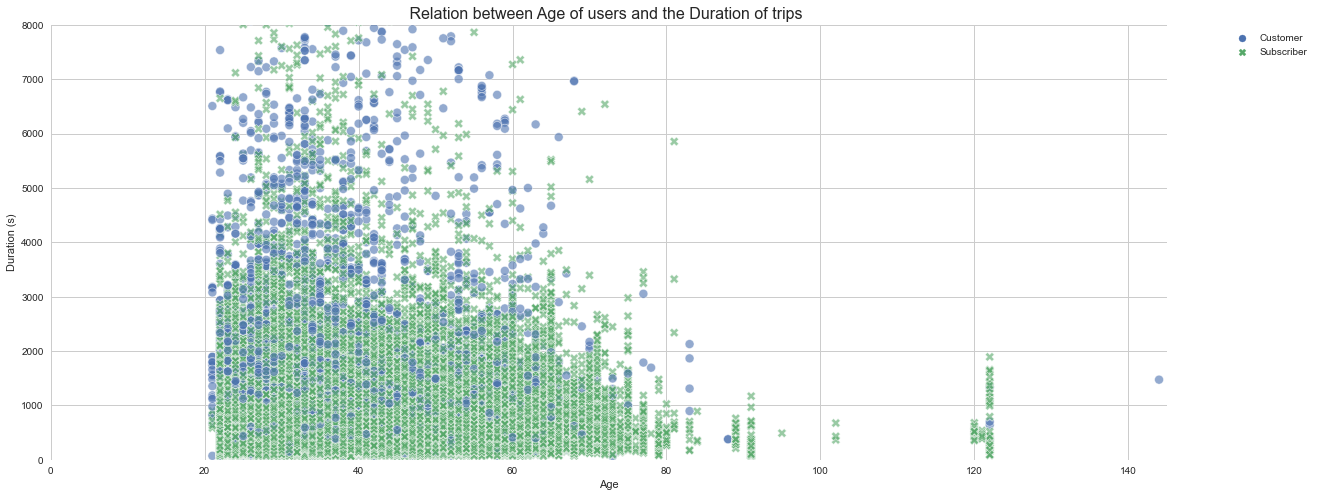

In [603]:
plt.figure(figsize=[20, 8])
sns.set_style('whitegrid')
sns.scatterplot(x= 'Age', y="duration_sec", style= 'user_type', hue= 'user_type',
                s=80,
                alpha=0.6, data= df)
plt.axis([0, 145, 0, 8000])
plt.title(' Relation between Age of users and the Duration of trips  ', fontsize = 16)
plt.xlabel("Age")
plt.ylabel('Duration (s)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

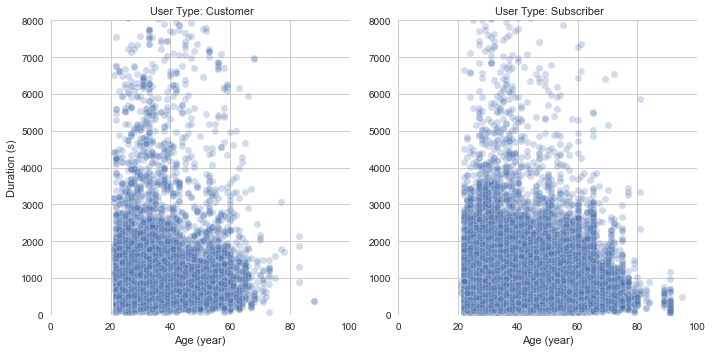

In [604]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, col='user_type', height = 5, 
                 xlim = (0, 100), ylim = (0, 8000), sharey= False)
g.map(sns.scatterplot, 'Age', 'duration_sec', alpha=0.25)
g.set_axis_labels('Age (year)', 'Duration (s)')
g.set_titles(col_template=' User Type: {col_name}');

### How does User who shares his bike for all trip at different ages effect on duration of trips?
- As we shown in below graphs, At higher age for User who don't share his bike for all trip having long trip duration than who shares his bike.

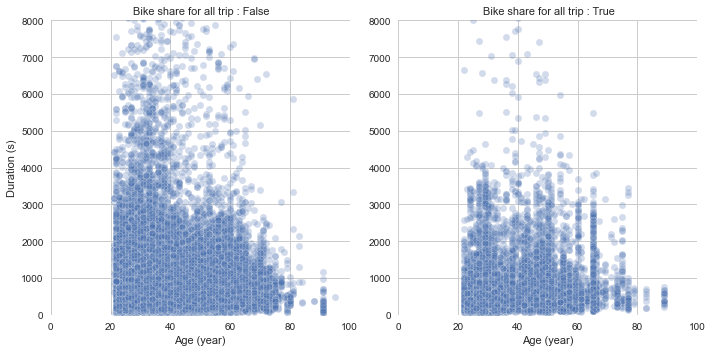

In [605]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df, col='bike_share_for_all_trip', height = 5, 
                 xlim = (0, 100), ylim = (0, 8000), sharey= False)
g.map(sns.scatterplot, 'Age', 'duration_sec', alpha=0.25)
g.set_axis_labels('Age (year)', 'Duration (s)')
g.set_titles(col_template=' Bike share for all trip : {col_name}');

### what time are the most trips taken in weekdays?

- at weekend and weekday in the morning at 7,8,9 AM and in the midday 4,5,6 PM 

In [606]:
gg = (
    df
    .groupby('weekday')
    .start_time_hour
    .value_counts()
    .unstack()
    .fillna(0)
)

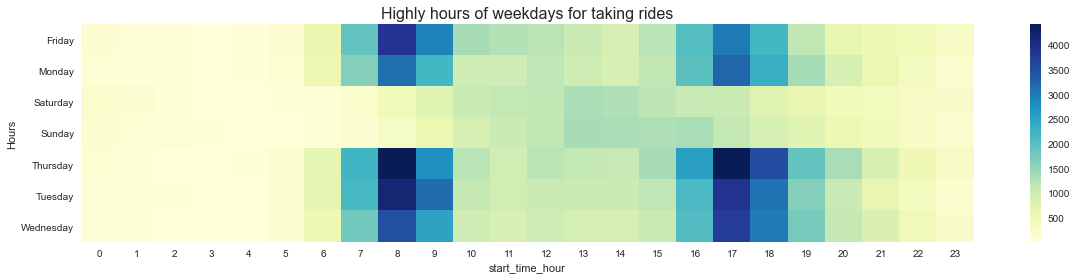

In [607]:
plt.figure(figsize=[20, 4])
sns.set_style('darkgrid')
sns.heatmap(gg, cmap='YlGnBu')
plt.ylabel('Hours')
plt.title('Highly hours of weekdays for taking rides', fontsize=16);

### Highly hours of weekdays for taking rides depending on user type?
- this is much different between customers and subscribers. 

In [608]:
customer = (df[df.user_type.isin(["Customer"])]
    .groupby('weekday')
    .start_time_hour
    .value_counts()
    .unstack()
    .fillna(0))
subsriber= (df[df.user_type.isin(["Subscriber"])]
    .groupby('weekday')
    .start_time_hour
    .value_counts()
    .unstack()
    .fillna(0))

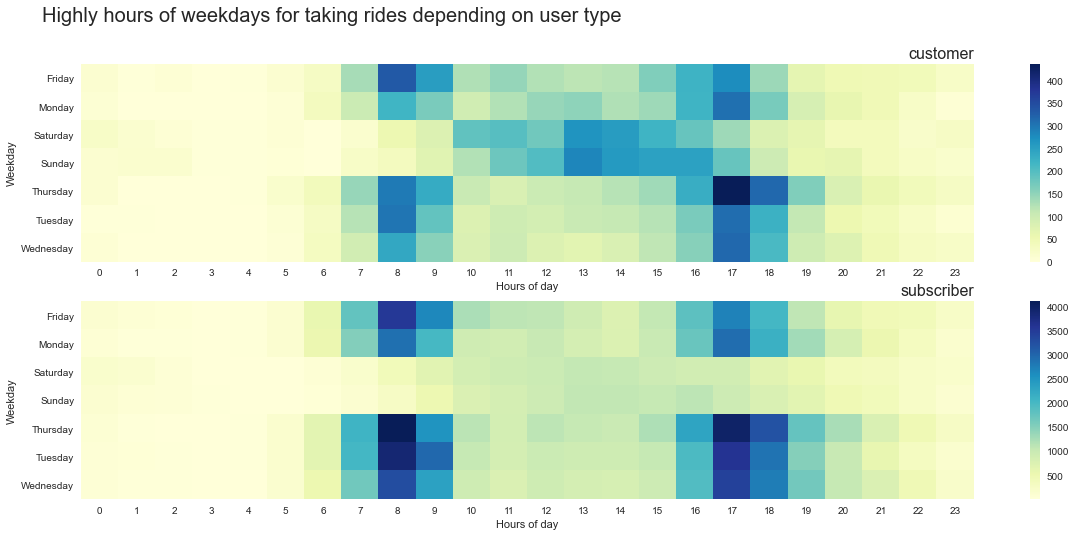

In [609]:
sns.set_style('darkgrid')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,8))
sns.heatmap(customer, ax=ax1, cmap='YlGnBu')
sns.heatmap(subsriber, ax=ax2, cmap='YlGnBu')
ax1.set_title('customer', loc="right", fontsize = 16)
ax2.set_title('subscriber', loc="right", fontsize = 16)
ax1.set_ylabel('Weekday')
ax2.set_ylabel('Weekday')
ax1.set_xlabel('Hours of day')
ax2.set_xlabel('Hours of day')
plt.suptitle('Highly hours of weekdays for taking rides depending on user type', fontsize= 20, weight=15, ha='right');